     Image  Min Red  Min Green  Min Blue  Max Red  Max Green  Max Blue  \
0    1.JPG        5          3         0      208        199       193   
1   10.JPG        4          0         0      255        255       255   
2  100.JPG        1          1         0      255        255       255   
3  101.JPG        0          0         0      255        255       255   
4  102.JPG        0          0         0      255        255       255   

    Mean Red  Mean Green  Mean Blue  ...  Median Green  Median Blue  \
0  68.085745   54.882747  39.891969  ...            37           24   
1  82.976700   63.632564  60.440382  ...            48           45   
2  57.150882   48.670160  43.055351  ...            27           22   
3  79.702799   64.672203  56.632629  ...            53           40   
4  68.930658   56.026051  50.024088  ...            38           30   

   Std Dev Red  Std Dev Green  Std Dev Blue    Perimeter      Area  \
0    47.955399      45.311197     36.250747     0.000000  

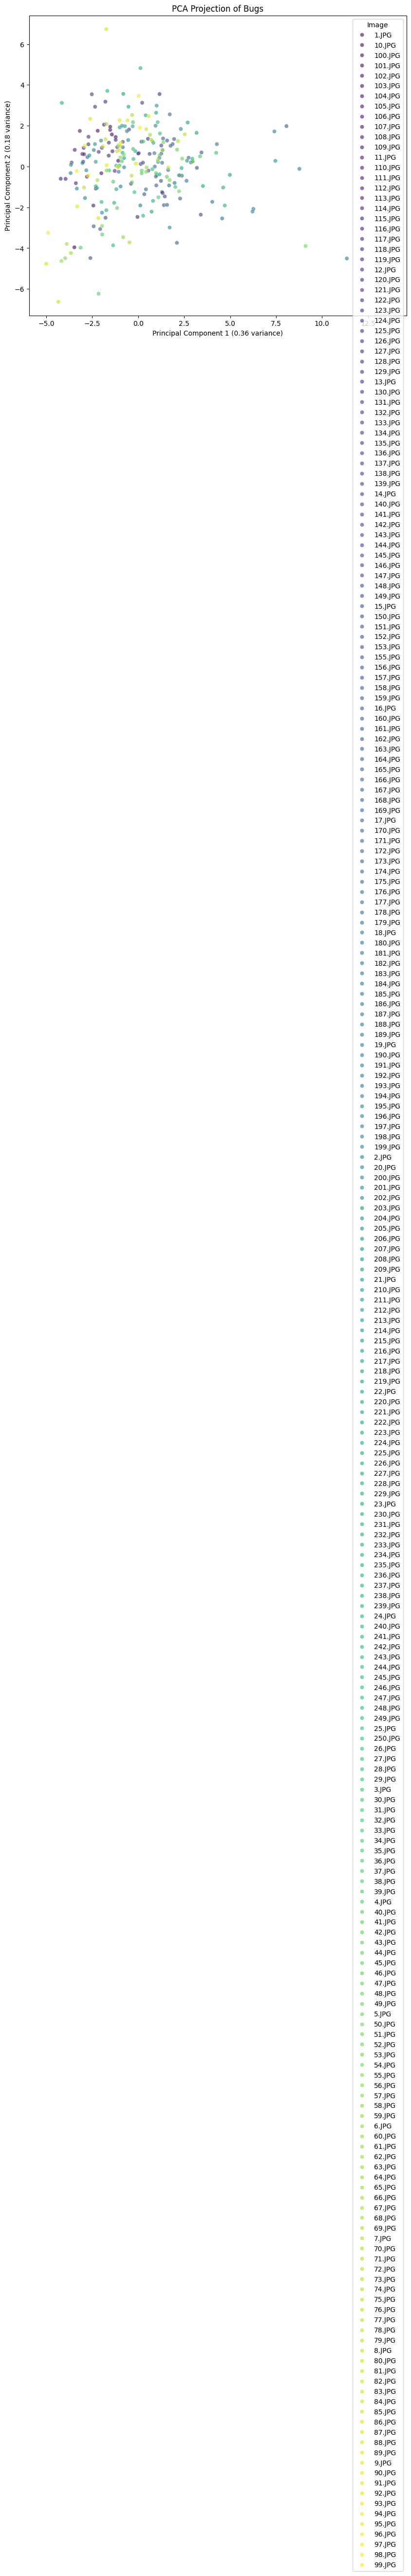

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier Excel
file_path = '../train/grostest.xlsx'
data = pd.read_excel(file_path)

# Afficher un aperçu des données
print(data.head())
print(data.dtypes)

# --- ÉTAPE 2 : Prétraitement des Données pour la PCA ---

# Sélectionner les colonnes des caractéristiques (exclure 'Image')
features = data.drop(columns=['Image'])

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# --- ÉTAPE 3 : Application de la PCA ---

# Appliquer la PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Image'] = data['Image']

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par les premières 2 composantes: {explained_variance.cumsum()}")

# --- ÉTAPE 4 : Visualisation des Résultats de la PCA ---

# Graphique PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Image', data=pca_df, palette='viridis', alpha=0.6)
plt.title('PCA Projection of Bugs')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance)')
plt.legend(title='Image')
plt.show()